### **Forecasting Electricity Demand using LSTM**
- This is Univariate timeseries forecasting to forecast Electricity Demand using LSTM.
- LSTM is a type of Recurrent Neural Network (RNN) that is designed to handle long-term and short-term dependencies in time series data.

**Read Data**

In [1]:
import pandas as pd

# Import dataset
df = pd.read_csv('NEMPRICEANDDEMAND_NSW1_202406182230.csv')

# Show top 5 data
df.head()

,Settlement Date,Spot Price ($/MWh),Scheduled Demand (MW),Scheduled Generation (MW),Semi Scheduled Generation (MW),Net Import (MW),Type
0,17/06/2024 22:35,212.77079,9311.24,8370.40503,283.97497,-647.41,ACTUAL
1,17/06/2024 22:40,212.36309,9309.36,8272.88241,287.36759,-742.20,ACTUAL
2,17/06/2024 22:45,212.85130,9168.77,8204.06446,299.49554,-661.56,ACTUAL
3,17/06/2024 22:50,213.89878,9203.84,8202.46476,299.25524,-696.86,ACTUAL
4,17/06/2024 22:55,194.83811,9148.42,8202.41152,296.48848,-641.66,ACTUAL


In [2]:
# Show info from data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Settlement Date                 347 non-null    object 
 1   Spot Price ($/MWh)              347 non-null    float64
 2   Scheduled Demand (MW)           347 non-null    float64
 3   Scheduled Generation (MW)       347 non-null    float64
 4   Semi Scheduled Generation (MW)  347 non-null    float64
 5   Net Import (MW)                 347 non-null    float64
 6   Type                            347 non-null    object 
dtypes: float64(5), object(2)
memory usage: 19.1+ KB


In [3]:
# Check null values
df.isnull().sum()

Settlement Date                   0
Spot Price ($/MWh)                0
Scheduled Demand (MW)             0
Scheduled Generation (MW)         0
Semi Scheduled Generation (MW)    0
Net Import (MW)                   0
Type                              0
dtype: int64

## Data Preparations

In [4]:
# Only use data where type = actual
df = df[df['Type'] == 'ACTUAL']

# Change 'Settlement Date' to datetime
df['Settlement Date'] = pd.to_datetime(df['Settlement Date'], format='%d/%m/%Y %H:%M')

df.head()

,Settlement Date,Spot Price ($/MWh),Scheduled Demand (MW),Scheduled Generation (MW),Semi Scheduled Generation (MW),Net Import (MW),Type
0,2024-06-17 22:35:00,212.77079,9311.24,8370.40503,283.97497,-647.41,ACTUAL
1,2024-06-17 22:40:00,212.36309,9309.36,8272.88241,287.36759,-742.20,ACTUAL
2,2024-06-17 22:45:00,212.85130,9168.77,8204.06446,299.49554,-661.56,ACTUAL
3,2024-06-17 22:50:00,213.89878,9203.84,8202.46476,299.25524,-696.86,ACTUAL
4,2024-06-17 22:55:00,194.83811,9148.42,8202.41152,296.48848,-641.66,ACTUAL


In [5]:
# Creating a new dataframe with only 'Scheduled Demand' and 'Settlement Date'
df_scheduled_demand = df[['Settlement Date', 'Scheduled Demand (MW)']]

# Display the new dataframe
df_scheduled_demand.head()

,Settlement Date,Scheduled Demand (MW)
0,2024-06-17 22:35:00,9311.24
1,2024-06-17 22:40:00,9309.36
2,2024-06-17 22:45:00,9168.77
3,2024-06-17 22:50:00,9203.84
4,2024-06-17 22:55:00,9148.42


In [6]:
# Make Settlement Date as Index Dataframe
df_scheduled_demand.set_index('Settlement Date', inplace=True)
df_scheduled_demand.head()

,Scheduled Demand (MW)
Settlement Date,
2024-06-17 22:35:00,9311.24
2024-06-17 22:40:00,9309.36
2024-06-17 22:45:00,9168.77
2024-06-17 22:50:00,9203.84
2024-06-17 22:55:00,9148.42


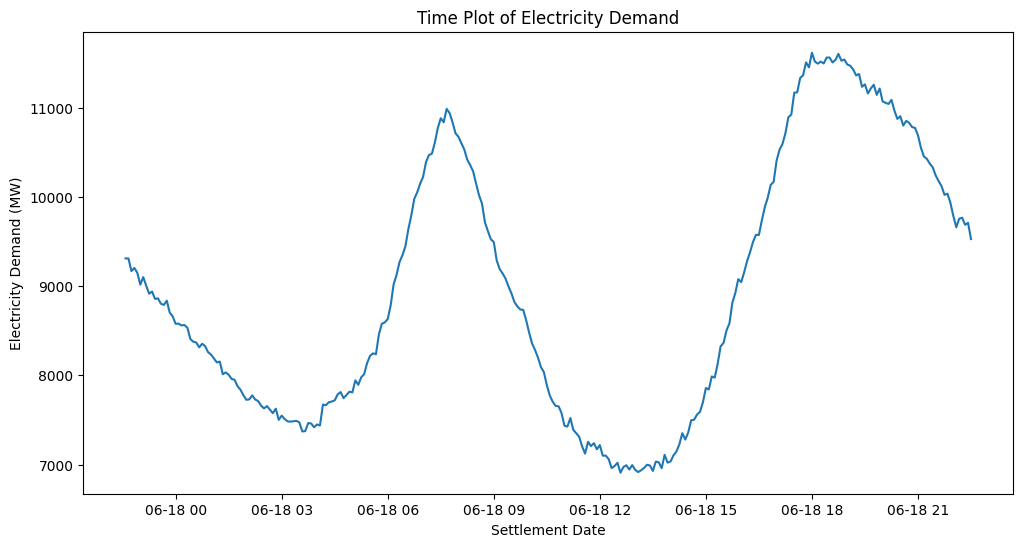

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_scheduled_demand['Scheduled Demand (MW)'], label='Scheduled Demand (MW)')
plt.xlabel('Settlement Date')
plt.ylabel('Electricity Demand (MW)')
plt.title('Time Plot of Electricity Demand')
plt.show()

## Data Processing

In [12]:
# Use 25% data as test data
test_size = int(len(df_scheduled_demand) * 25 / 100)
train_data = df_scheduled_demand[:-test_size]
test_data = df_scheduled_demand[-test_size:]

print(f"Length of train data = {len(train_data)}")
print(f"Length of test data = {len(test_data)}")

Length of train data = 216
Length of test data = 72


In [13]:
# Scaling data
# The purpose of scaling data is to make data have same scale (0 - 1), so it will more suitable for the model.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [14]:
scaled_train_data

array([[0.58917425],
       [0.58871335],
       [0.5542464 ],
       [0.56284414],
       [0.54925741],
       [0.51702141],
       [0.53775209],
       [0.51422414],
       [0.49208135],
       [0.4979995 ],
       [0.47791605],
       [0.47918842],
       [0.46460635],
       [0.46123296],
       [0.4729148 ],
       [0.44002177],
       [0.42966869],
       [0.40937931],
       [0.40973724],
       [0.4048316 ],
       [0.40617017],
       [0.39839617],
       [0.36726829],
       [0.36008512],
       [0.3579841 ],
       [0.34473079],
       [0.35441458],
       [0.34808947],
       [0.33152651],
       [0.32492437],
       [0.31398046],
       [0.30310274],
       [0.30544646],
       [0.27083487],
       [0.27569638],
       [0.26944972],
       [0.25789045],
       [0.25537757],
       [0.23807668],
       [0.22820166],
       [0.21307042],
       [0.20047904],
       [0.20165335],
       [0.2125703 ],
       [0.20127336],
       [0.19697081],
       [0.18447259],
       [0.176

In [15]:
scaled_test_data

array([[0.69383277],
       [0.7298099 ],
       [0.7558924 ],
       [0.79100412],
       [0.79947928],
       [0.85757959],
       [0.88786657],
       [0.90342439],
       [0.93308866],
       [0.97691089],
       [0.98437354],
       [1.04461655],
       [1.04557022],
       [1.08479816],
       [1.0925599 ],
       [1.12797807],
       [1.11430063],
       [1.15442096],
       [1.12996632],
       [1.12445758],
       [1.13000554],
       [1.12492339],
       [1.14126081],
       [1.14102545],
       [1.1275613 ],
       [1.13482782],
       [1.1511775 ],
       [1.13243507],
       [1.13563195],
       [1.12220457],
       [1.11861789],
       [1.10846339],
       [1.0919372 ],
       [1.09591859],
       [1.0607039 ],
       [1.06746049],
       [1.04247385],
       [1.05624445],
       [1.06637199],
       [1.03861259],
       [1.0560042 ],
       [1.02056887],
       [1.01668064],
       [1.01366273],
       [1.02486651],
       [0.99544004],
       [0.97257403],
       [0.979

In [16]:
print("Length of scaled train data = ", len(scaled_train_data))
print("Length of scaled test data = ", len(scaled_test_data))

Length of scaled train data =  216
Length of scaled test data =  72


**Generate Time Series Sequence**

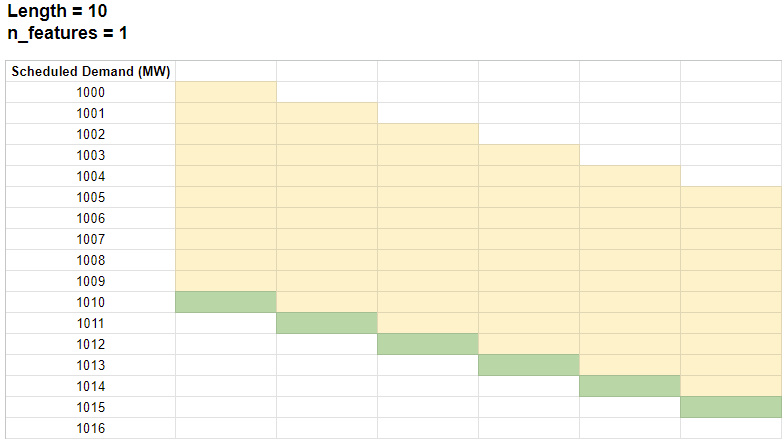

In [17]:
# Importing the keras library and the TimeseriesGenerator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


# Length can be considered as the number of entries that are to be used as inputs
# in order to determine/predict the next number in a sequence. 

# Number of features value is 1 as only one dataset feature is examined. The Date is not a feature as it comprises the index
# of the dataset (in Monthly Time steps)

# batch_size of value 1 has been selected, where at each batch 60 time series values are to be trained so as
# to predict the next number in the sequence
length = 60
n_features = 1
time_series_generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=length, batch_size=1)

2024-06-30 13:27:17.159347: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-30 13:27:17.193322: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-30 13:27:17.374072: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-30 13:27:18.886775: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [18]:
# First batch of the time_series_generators
X,y=time_series_generator[0]

In [19]:
# At the first batch, the generator takes the first 60 values and trains them to predict the next number
X

array([[[0.58917425],
        [0.58871335],
        [0.5542464 ],
        [0.56284414],
        [0.54925741],
        [0.51702141],
        [0.53775209],
        [0.51422414],
        [0.49208135],
        [0.4979995 ],
        [0.47791605],
        [0.47918842],
        [0.46460635],
        [0.46123296],
        [0.4729148 ],
        [0.44002177],
        [0.42966869],
        [0.40937931],
        [0.40973724],
        [0.4048316 ],
        [0.40617017],
        [0.39839617],
        [0.36726829],
        [0.36008512],
        [0.3579841 ],
        [0.34473079],
        [0.35441458],
        [0.34808947],
        [0.33152651],
        [0.32492437],
        [0.31398046],
        [0.30310274],
        [0.30544646],
        [0.27083487],
        [0.27569638],
        [0.26944972],
        [0.25789045],
        [0.25537757],
        [0.23807668],
        [0.22820166],
        [0.21307042],
        [0.20047904],
        [0.20165335],
        [0.2125703 ],
        [0.20127336],
        [0

In [20]:
# As it can be observed, the first 60 scaled training 'Scheduled Demand (MW)' values are the X input values
scaled_train_data[:60]

array([[0.58917425],
       [0.58871335],
       [0.5542464 ],
       [0.56284414],
       [0.54925741],
       [0.51702141],
       [0.53775209],
       [0.51422414],
       [0.49208135],
       [0.4979995 ],
       [0.47791605],
       [0.47918842],
       [0.46460635],
       [0.46123296],
       [0.4729148 ],
       [0.44002177],
       [0.42966869],
       [0.40937931],
       [0.40973724],
       [0.4048316 ],
       [0.40617017],
       [0.39839617],
       [0.36726829],
       [0.36008512],
       [0.3579841 ],
       [0.34473079],
       [0.35441458],
       [0.34808947],
       [0.33152651],
       [0.32492437],
       [0.31398046],
       [0.30310274],
       [0.30544646],
       [0.27083487],
       [0.27569638],
       [0.26944972],
       [0.25789045],
       [0.25537757],
       [0.23807668],
       [0.22820166],
       [0.21307042],
       [0.20047904],
       [0.20165335],
       [0.2125703 ],
       [0.20127336],
       [0.19697081],
       [0.18447259],
       [0.176

In [21]:
# The y value of the time_series_generator first batch corresponds to the 60th [index 60] value of the scaled train data
print(y)
print(scaled_train_data[60])

[[0.11335922]]
[0.11335922]


## **Modeling**

Reference :
- LSTM Concept & math : https://www.youtube.com/watch?v=YCzL96nL7j0&t=358s

In [22]:
# Importing the necessary libraries to create/construct the neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras import initializers
import tensorflow as tf

# Initially, the network model is defined 
model = Sequential()

# Hidden layer neurons are chosen to be 60  which is equal to the defined length (number of past time series data per batch)
# Selected Activation function has been the rectified linear unit
model.add(LSTM(60, 
               activation = 'relu', 
               input_shape = (length, n_features)))

# The output layer consists of 1 neuron with a 'linear' activation fuction 
model.add(Dense(1,activation='linear'))

# The model is compiled with selected loss function= 'mse', whereas the selected optimizer is 'adam' 
opt = tf.keras.optimizers.Adam()
model.compile(optimizer=opt, loss='mse')

# A validation generator is constructed in a similar way to the previous time_series_generator with the only difference being
# the use of scaled_test values for validation purposes
time_series_val_generator = TimeseriesGenerator(scaled_test_data,scaled_test_data, length=length, batch_size=1)

# Demonstration of EarlyStopping. LSTM training stops if the required conditions are met (e.g not improvement of the
# loss value for 10 consecutive epochs)
from tensorflow.keras.callbacks import EarlyStopping
Early_Stopping = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

# The model is ready to be trained for a maximum of 100 epochs. The training process is monitored and at each epoch both 
# training and validation losses can be observed due to the presence of the time_series_val_generator
model.fit(time_series_generator,
          epochs = 100,
          validation_data = time_series_val_generator,
          callbacks=[Early_Stopping])

Epoch 1/100


2024-06-30 13:27:29.651150: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-30 13:27:29.652083: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/laode/personal/electricity-demand-forecast/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  5/156 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.2326

/home/laode/personal/electricity-demand-forecast/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


156/156 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0950 - val_loss: 0.0047
Epoch 2/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0098 - val_loss: 0.0035
Epoch 3/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0017 - val_loss: 0.0048
Epoch 4/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 7.7919e-04 - val_loss: 0.0021
Epoch 5/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 8.4328e-04 - val_loss: 0.0011
Epoch 6/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - loss: 8.2811e-04 - val_loss: 4.9557e-04
Epoch 7/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 7.9133e-04 - val_loss: 0.0044
Epoch 8/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 7.8037e-04 - val_loss: 0.0019
Epoch 9/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 8.0653e-04 - val_loss: 0.0016
Epoch 10/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 5.5588e-04 - val_loss: 5.7382e-04
Epoch 11/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 5.5611e-04 - val_loss: 0.0044
E

Text(0, 0.5, "Loss-'MSE'")

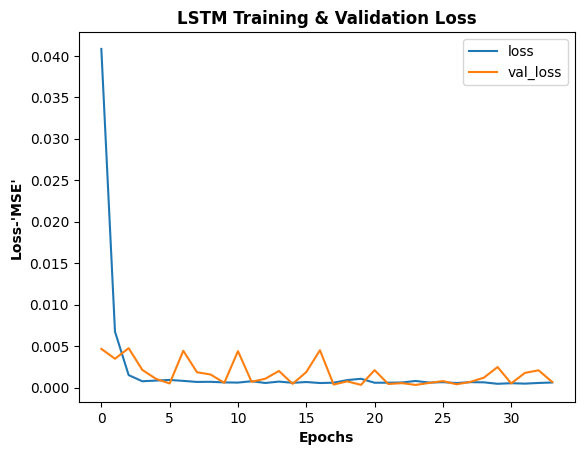

In [23]:
import matplotlib.pyplot as plt
# Training and validation loss plots
loss = pd.DataFrame(model.history.history)
loss.plot()
plt.title('LSTM Training & Validation Loss',fontweight='bold')
plt.xlabel('Epochs',fontweight='bold')
plt.ylabel("Loss-'MSE'",fontweight='bold')

In [24]:
print(len(scaled_train_data))
scaled_train_data[:5]

216


array([[0.58917425],
       [0.58871335],
       [0.5542464 ],
       [0.56284414],
       [0.54925741]])

In [25]:
print(len(scaled_train_data[:length].reshape((1, length, n_features))[0]))
scaled_train_data[:length].reshape((1, length, n_features))[0][:5]

60


array([[0.58917425],
       [0.58871335],
       [0.5542464 ],
       [0.56284414],
       [0.54925741]])

In [26]:
# Determining all LSTM Training values so as to compare them with the actual dataset values used for the training process
import numpy as np

training_outputs = []
batch = scaled_train_data[:length].reshape((1, length, n_features))

for i in range(len(scaled_train_data[length:])):
    train_out = model.predict(batch)[0]
    training_outputs.append(train_out) 
    print(f"Training_outputs : {training_outputs}")
    batch = np.append(batch[:,1:,:],[[scaled_train_data[length:][i]]],axis=1)
    print(f"len(batch[0]) : {len(batch[0])}")
    print(f"batch : {batch}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
Training_outputs : [array([0.1565209], dtype=float32)]
len(batch[0]) : 60
batch : [[[0.58871335]
  [0.5542464 ]
  [0.56284414]
  [0.54925741]
  [0.51702141]
  [0.53775209]
  [0.51422414]
  [0.49208135]
  [0.4979995 ]
  [0.47791605]
  [0.47918842]
  [0.46460635]
  [0.46123296]
  [0.4729148 ]
  [0.44002177]
  [0.42966869]
  [0.40937931]
  [0.40973724]
  [0.4048316 ]
  [0.40617017]
  [0.39839617]
  [0.36726829]
  [0.36008512]
  [0.3579841 ]
  [0.34473079]
  [0.35441458]
  [0.34808947]
  [0.33152651]
  [0.32492437]
  [0.31398046]
  [0.30310274]
  [0.30544646]
  [0.27083487]
  [0.27569638]
  [0.26944972]
  [0.25789045]
  [0.25537757]
  [0.23807668]
  [0.22820166]
  [0.21307042]
  [0.20047904]
  [0.20165335]
  [0.2125703 ]
  [0.20127336]
  [0.19697081]
  [0.18447259]
  [0.17682852]
  [0.18310705]
  [0.173487  ]
  [0.16377869]
  [0.17605627]
  [0.14536968]
  [0.15690687]
  [0.1475614 ]
  [0.14110881]
  [0.14046649]
  [0.141555  ]
  [0.14253318]
  [0.1383

In [27]:
# Creating a numpy array and applying the inverse_transform function to get the actual training values. 
actual_train=scaled_train_data[length:]
actual_train=scaler.inverse_transform(actual_train)

In [28]:
actual_train

array([[ 7370.4 ],
       [ 7374.66],
       [ 7464.47],
       [ 7460.39],
       [ 7417.6 ],
       [ 7449.06],
       [ 7437.44],
       [ 7671.85],
       [ 7665.01],
       [ 7697.79],
       [ 7706.11],
       [ 7719.45],
       [ 7786.1 ],
       [ 7812.25],
       [ 7744.3 ],
       [ 7779.01],
       [ 7816.51],
       [ 7808.5 ],
       [ 7943.77],
       [ 7893.73],
       [ 7977.88],
       [ 8013.04],
       [ 8137.49],
       [ 8218.24],
       [ 8246.08],
       [ 8236.46],
       [ 8458.48],
       [ 8578.37],
       [ 8593.07],
       [ 8631.1 ],
       [ 8784.58],
       [ 9020.46],
       [ 9126.31],
       [ 9269.88],
       [ 9347.09],
       [ 9446.23],
       [ 9639.23],
       [ 9791.46],
       [ 9977.48],
       [10052.  ],
       [10148.88],
       [10224.32],
       [10391.05],
       [10469.54],
       [10484.87],
       [10610.16],
       [10772.39],
       [10882.15],
       [10837.54],
       [10986.99],
       [10940.1 ],
       [10837.27],
       [1071

In [29]:
# Applying the inverse_transform function to the training_outputs to get their mean MonthlyMinTemp values
train_predictions=scaler.inverse_transform(training_outputs)

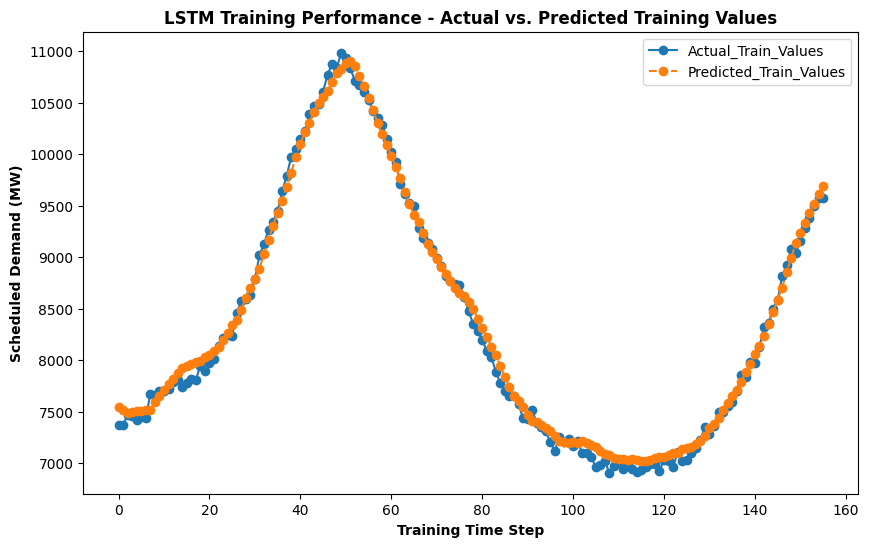

In [30]:
#'LSTM Training Performance - Actual vs. Predicted Training Values'
plt.figure(figsize=(10,6))
plt.plot(actual_train,marker='o',linestyle='-')

plt.plot(train_predictions,marker='o',linestyle='dashed')
plt.title('LSTM Training Performance - Actual vs. Predicted Training Values',fontweight='bold')
plt.legend(('Actual_Train_Values','Predicted_Train_Values'))
plt.xlabel('Training Time Step',fontweight='bold')
plt.ylabel('Scheduled Demand (MW)',fontweight='bold');

/tmp/ipykernel_353961/3808656546.py:7: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_err['Training Error'],
/tmp/ipykernel_353961/3808656546.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_err['Training Error'],


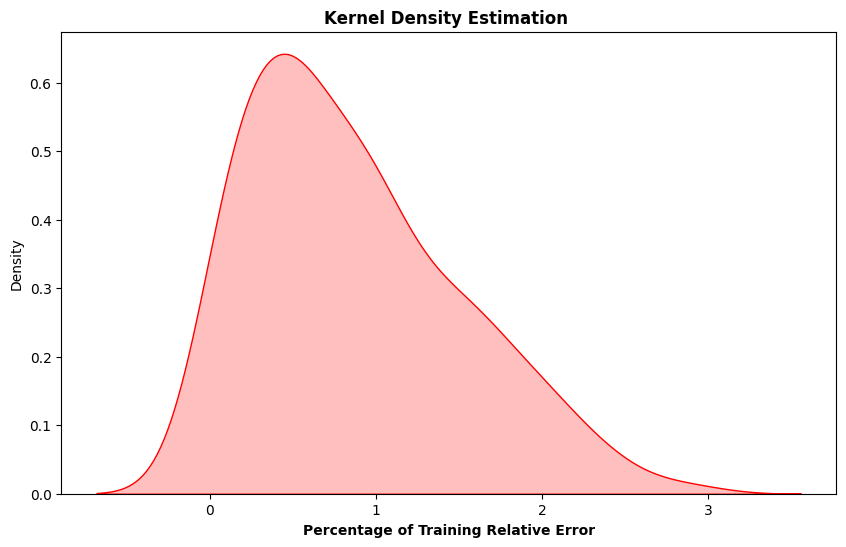

In [31]:
import seaborn as sns

# Training relative Error Percentage distribution plot
train_err=abs((actual_train - train_predictions) / actual_train)*100
train_err=pd.DataFrame(train_err,columns=['Training Error'])
plt.figure(figsize=(10,6))
sns.kdeplot(train_err['Training Error'], 
            shade = True,
            color = 'r',
            kernel='gau')
plt.xlabel('Percentage of Training Relative Error', fontweight='bold')
plt.title('Kernel Density Estimation ', fontweight='bold');

In [32]:
# Summary statistics of training relative error

train_err.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Training Error,156.0,0.871983,0.632411,0.011008,0.373942,0.792158,1.252058,2.868108


In [33]:
print(len(scaled_train_data))
print(scaled_train_data)

216
[[0.58917425]
 [0.58871335]
 [0.5542464 ]
 [0.56284414]
 [0.54925741]
 [0.51702141]
 [0.53775209]
 [0.51422414]
 [0.49208135]
 [0.4979995 ]
 [0.47791605]
 [0.47918842]
 [0.46460635]
 [0.46123296]
 [0.4729148 ]
 [0.44002177]
 [0.42966869]
 [0.40937931]
 [0.40973724]
 [0.4048316 ]
 [0.40617017]
 [0.39839617]
 [0.36726829]
 [0.36008512]
 [0.3579841 ]
 [0.34473079]
 [0.35441458]
 [0.34808947]
 [0.33152651]
 [0.32492437]
 [0.31398046]
 [0.30310274]
 [0.30544646]
 [0.27083487]
 [0.27569638]
 [0.26944972]
 [0.25789045]
 [0.25537757]
 [0.23807668]
 [0.22820166]
 [0.21307042]
 [0.20047904]
 [0.20165335]
 [0.2125703 ]
 [0.20127336]
 [0.19697081]
 [0.18447259]
 [0.17682852]
 [0.18310705]
 [0.173487  ]
 [0.16377869]
 [0.17605627]
 [0.14536968]
 [0.15690687]
 [0.1475614 ]
 [0.14110881]
 [0.14046649]
 [0.141555  ]
 [0.14253318]
 [0.13833605]
 [0.11335922]
 [0.1144036 ]
 [0.13642136]
 [0.13542111]
 [0.12493074]
 [0.13264345]
 [0.1297947 ]
 [0.1872625 ]
 [0.18558561]
 [0.19362193]
 [0.19566166]
 [

In [34]:
print(len(scaled_train_data[-length:].reshape((1, length, n_features))[0]))
scaled_train_data[-length:].reshape((1, length, n_features))[0]

60


array([[0.05260629],
       [0.08482268],
       [0.07326096],
       [0.08115264],
       [0.064396  ],
       [0.07603371],
       [0.04688427],
       [0.04710982],
       [0.03739906],
       [0.01277525],
       [0.01837714],
       [0.02740391],
       [0.        ],
       [0.01566323],
       [0.02052474],
       [0.00860264],
       [0.02090964],
       [0.00797994],
       [0.00178966],
       [0.00674678],
       [0.01308906],
       [0.02179221],
       [0.0200001 ],
       [0.00497428],
       [0.03057382],
       [0.02864932],
       [0.01248842],
       [0.04915935],
       [0.02765152],
       [0.03083369],
       [0.04767613],
       [0.05838469],
       [0.07818866],
       [0.10868403],
       [0.09110856],
       [0.1103217 ],
       [0.14403846],
       [0.14554864],
       [0.15982182],
       [0.1673384 ],
       [0.19374942],
       [0.23297246],
       [0.22868217],
       [0.26458575],
       [0.2613472 ],
       [0.29939102],
       [0.34724367],
       [0.356

In [35]:
# Determining all LSTM Training values so as to compare them with the actual dataset values used for the training process
import numpy as np

test_outputs = []
batch = scaled_test_data[:length].reshape((1, length, n_features))

for i in range(len(scaled_test_data[length:])):
    test_out = model.predict(batch)[0]
    test_outputs.append(test_out) 
    print(f"test_outputs : {test_outputs}")
    batch = np.append(batch[:,1:,:],[[scaled_test_data[length:][i]]],axis=1)
    print(f"len(batch[0]) : {len(batch[0])}")
    print(f"batch : {batch}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
test_outputs : [array([0.7776595], dtype=float32)]
len(batch[0]) : 60
batch : [[[0.7298099 ]
  [0.7558924 ]
  [0.79100412]
  [0.79947928]
  [0.85757959]
  [0.88786657]
  [0.90342439]
  [0.93308866]
  [0.97691089]
  [0.98437354]
  [1.04461655]
  [1.04557022]
  [1.08479816]
  [1.0925599 ]
  [1.12797807]
  [1.11430063]
  [1.15442096]
  [1.12996632]
  [1.12445758]
  [1.13000554]
  [1.12492339]
  [1.14126081]
  [1.14102545]
  [1.1275613 ]
  [1.13482782]
  [1.1511775 ]
  [1.13243507]
  [1.13563195]
  [1.12220457]
  [1.11861789]
  [1.10846339]
  [1.0919372 ]
  [1.09591859]
  [1.0607039 ]
  [1.06746049]
  [1.04247385]
  [1.05624445]
  [1.06637199]
  [1.03861259]
  [1.0560042 ]
  [1.02056887]
  [1.01668064]
  [1.01366273]
  [1.02486651]
  [0.99544004]
  [0.97257403]
  [0.97987242]
  [0.95423611]
  [0.9669991 ]
  [0.96181643]
  [0.95004879]
  [0.94783745]
  [0.92742794]
  [0.89311053]
  [0.8692835 ]
  [0.86277697]
  [0.84968791]
  [0.83970257]
  [0.81722882]

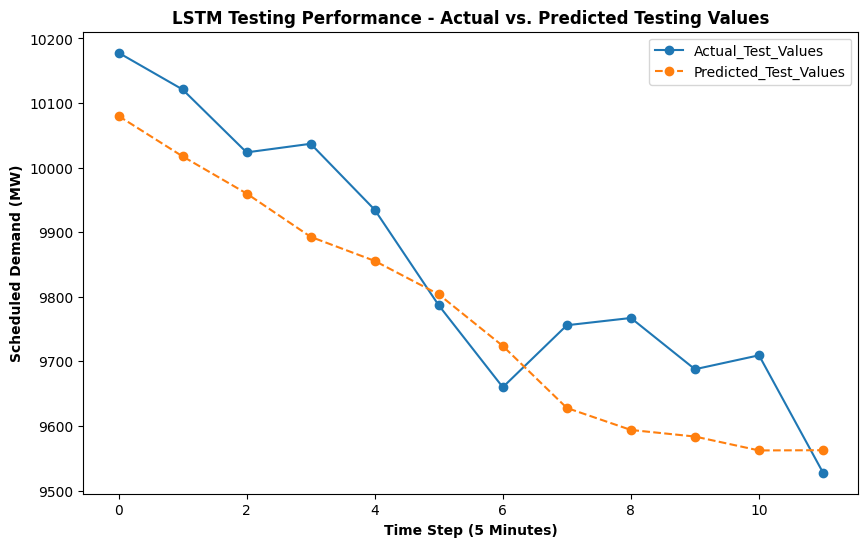

In [36]:
# Creating a numpy array and applying the inverse_transform function to get the actual test values. 
actual_test=scaled_test_data[length:]
actual_test=scaler.inverse_transform(actual_test)


# Applying the inverse_transform function to the test_outputs to get their mean MonthlyMinTemp values
test_predictions=scaler.inverse_transform(test_outputs)

#'LSTM Training Performance - Actual vs. Predicted Training Values'
plt.figure(figsize=(10,6))
plt.plot(actual_test,marker='o',linestyle='-')

plt.plot(test_predictions,marker='o',linestyle='dashed')
plt.title('LSTM Testing Performance - Actual vs. Predicted Testing Values',fontweight='bold')
plt.legend(('Actual_Test_Values','Predicted_Test_Values'))
plt.xlabel('Time Step (5 Minutes)',fontweight='bold')
plt.ylabel('Scheduled Demand (MW)',fontweight='bold');


In [37]:
# Importing the metrics
from sklearn.metrics import mean_squared_error

# Root Mean Squared Error
print(np.sqrt(mean_squared_error(actual_test,test_predictions)))

106.47144453140352


Estimated error is about 106 Megawatts

## Forecast

In [38]:
# A new scaler is being initialized
data_scaler=MinMaxScaler()

In [39]:
# fit_transform function applied to all dataset's entries
scaled_set=data_scaler.fit_transform(df_scheduled_demand)

In [40]:
len(scaled_set)

288

In [41]:
# A new TimeseriesGenerator is created to include the new scaled values, with batch_size = 1 of length=60
length = 60
n_features = 1
data_generator=TimeseriesGenerator(scaled_set,
                                   scaled_set,
                                   length = length,
                                   batch_size = 1)

In [42]:
# Initially, the network model is defined 
model = Sequential()

# Hidden layer neurons are chosen to be 60  which is equal to the defined length (number of past time series data per batch)
# Selected Activation function has been the rectified linear unit
model.add(LSTM(60, activation='relu', input_shape=(length, n_features)))
# The output layer consists of 1 neuron with a 'linear' activation fuction 
model.add(Dense(1,activation='linear'))
# The model is compiled with selected loss function= 'mse', whereas the selected optimizer is 'adam' 
opt = tf.keras.optimizers.Adam()
model.compile(optimizer=opt, loss='mse')

# Demonstration of EarlyStopping. LSTM training stops if the required conditions are met (e.g not improvement of the
# loss value for 10 consecutive epochs)
from tensorflow.keras.callbacks import EarlyStopping
Early_Stopping = EarlyStopping(monitor='loss',mode='min',verbose=1,patience=10)

# The model is ready to be trained for a maximum of 100 epochs. The training process is monitored and at each epoch both 
# training and validation losses can be observed due to the presence of the time_series_val_generator
model.fit(time_series_generator,
          epochs = 100,
          callbacks=[Early_Stopping])

Epoch 1/100


/home/laode/personal/electricity-demand-forecast/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


156/156 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0996
Epoch 2/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0055
Epoch 3/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0013
Epoch 4/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 8.6260e-04
Epoch 5/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 8.8410e-04
Epoch 6/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 7.6760e-04
Epoch 7/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 7.0464e-04
Epoch 8/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 6.0413e-04
Epoch 9/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 7.9348e-04
Epoch 10/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 7.8744e-04
Epoch 11/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 6.1835e-04
Epoch 12/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 5.9373e-04
Epoch 13/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 7.0657e-04
Epoch 14/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 8.9151e-

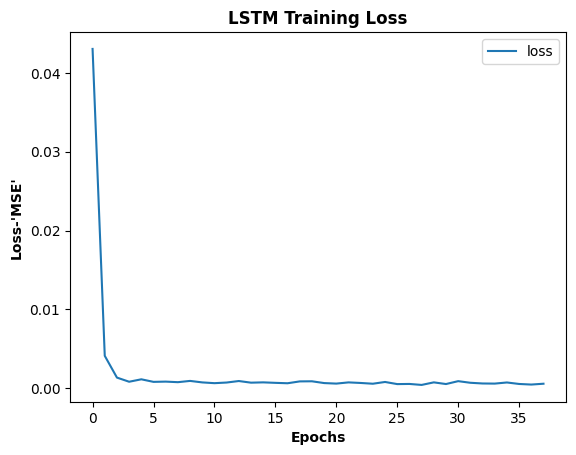

In [43]:
# Training Performance
loss=pd.DataFrame(model.history.history)
loss.plot()
plt.title('LSTM Training Loss',fontweight='bold')
plt.xlabel('Epochs',fontweight='bold')
plt.ylabel("Loss-'MSE'",fontweight='bold');

In [44]:
scaled_set[length:]

array([[0.09819574],
       [0.09910042],
       [0.11817298],
       [0.11730652],
       [0.1082194 ],
       [0.11490042],
       [0.11243273],
       [0.16221336],
       [0.16076078],
       [0.16772212],
       [0.16948901],
       [0.17232196],
       [0.18647613],
       [0.19202949],
       [0.17759925],
       [0.18497046],
       [0.19293417],
       [0.19123312],
       [0.21995982],
       [0.20933304],
       [0.22720361],
       [0.23467039],
       [0.26109929],
       [0.27824781],
       [0.28416007],
       [0.28211712],
       [0.32926653],
       [0.35472705],
       [0.35784882],
       [0.36592509],
       [0.39851896],
       [0.44861177],
       [0.47109067],
       [0.50158   ],
       [0.51797675],
       [0.53903068],
       [0.58001724],
       [0.61234566],
       [0.65184992],
       [0.6676754 ],
       [0.68824939],
       [0.70427025],
       [0.73967797],
       [0.75634655],
       [0.75960211],
       [0.7862094 ],
       [0.82066148],
       [0.843

In [45]:
scaled_set[:length].reshape((1, length, n_features))

array([[[0.51036344],
        [0.5099642 ],
        [0.48010771],
        [0.48755537],
        [0.47578607],
        [0.44786212],
        [0.46581975],
        [0.44543902],
        [0.42625816],
        [0.43138467],
        [0.41398767],
        [0.41508985],
        [0.40245834],
        [0.39953619],
        [0.40965542],
        [0.38116232],
        [0.37219412],
        [0.35461874],
        [0.35492879],
        [0.35067936],
        [0.35183887],
        [0.34510476],
        [0.3181407 ],
        [0.31191838],
        [0.31009841],
        [0.29861792],
        [0.30700637],
        [0.30152733],
        [0.28717991],
        [0.28146091],
        [0.2719809 ],
        [0.26255824],
        [0.26458846],
        [0.23460668],
        [0.23881789],
        [0.23340681],
        [0.22339377],
        [0.22121702],
        [0.20623038],
        [0.1976763 ],
        [0.18456909],
        [0.17366199],
        [0.17467922],
        [0.18413586],
        [0.17435006],
        [0

In [46]:
# Determining all LSTM Training values so as to compare them with the actual  dataset input values used for the training process
full_training_outputs = []
batch = scaled_set[:length].reshape((1, length, n_features))

for i in range(len(scaled_set[length:])):
    full_train_out = model.predict(batch)[0]
    full_training_outputs.append(full_train_out) 
    batch = np.append(batch[:,1:,:],[[scaled_set[length:][i]]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━

In [47]:
# Creating a numpy array and applying the inverse_transform function to get the actual training values. 
f_train=scaled_set[length:]
f_train=data_scaler.inverse_transform(f_train)

In [48]:
# Applying the inverse_transform function to the training_outputs to get their Scheduled Demand values
f_train_predictions=data_scaler.inverse_transform(full_training_outputs)

In [49]:
print(f"Length f_train : {len(f_train)}")
print(f"Length f_train_predictions : {len(f_train_predictions)}")

Length f_train : 228
Length f_train_predictions : 228


In [50]:
# Create a DataFrame from f_train and f_train_predictions
import pandas as pd

# Assuming 'settlement_date' is the index of the original dataset
# and it is a datetime index with a frequency of 5 minutes
# Adjust the settlement date with actual data
settlement_date = pd.date_range(start='2024-06-18 03:35:00', periods=len(f_train), freq='5T')

# Create the DataFrame
df_actual_vs_pred = pd.DataFrame({
    'Settlement Date': settlement_date,
    'Actual Values': f_train.flatten(),
    'Predicted Values': f_train_predictions.flatten()
})

# Set the index to 'Settlement Date'
df_actual_vs_pred.set_index('Settlement Date', inplace=True)

# Display the DataFrame
df_actual_vs_pred




/tmp/ipykernel_353961/2793468637.py:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  settlement_date = pd.date_range(start='2024-06-18 03:35:00', periods=len(f_train), freq='5T')


,Actual Values,Predicted Values
Settlement Date,,
2024-06-18 03:35:00,7370.40,7441.016296
2024-06-18 03:40:00,7374.66,7410.441062
2024-06-18 03:45:00,7464.47,7386.825845
2024-06-18 03:50:00,7460.39,7392.425175
2024-06-18 03:55:00,7417.60,7398.796557
...,...,...
2024-06-18 22:10:00,9755.94,9610.656233
2024-06-18 22:15:00,9767.18,9571.531126
2024-06-18 22:20:00,9687.79,9556.443433


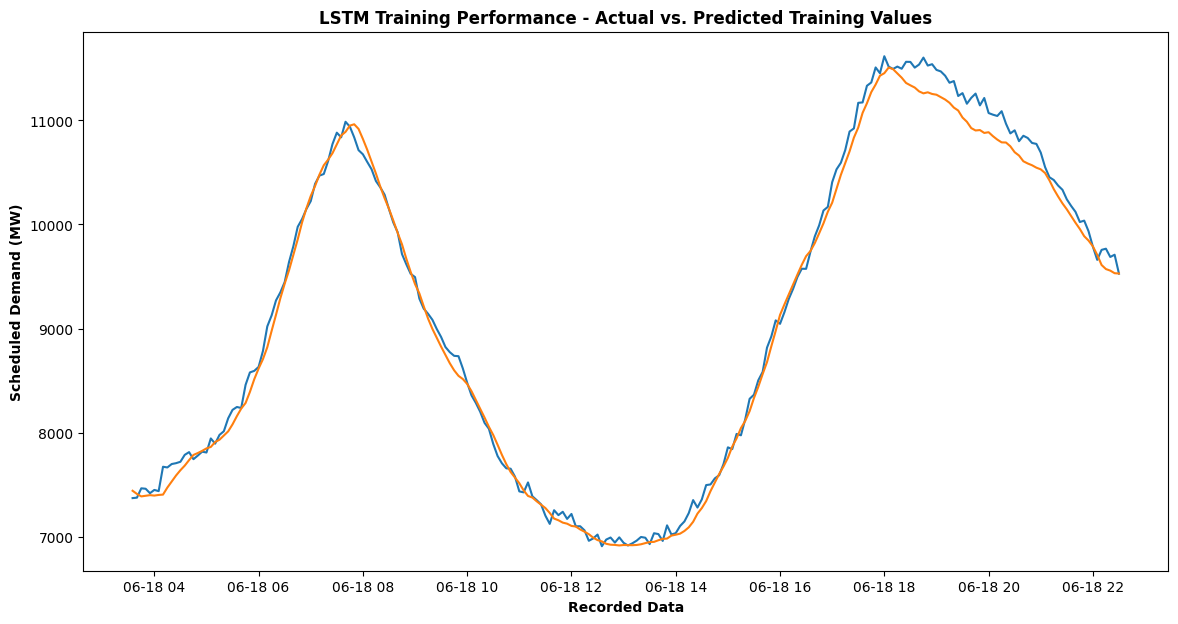

In [51]:
#'LSTM Training Performance - Actual vs. Predicted Training Values'
# Plotting the data
plt.figure(figsize=(14, 7))

plt.plot(df_actual_vs_pred['Actual Values'], label='Actual Values')
plt.plot(df_actual_vs_pred['Predicted Values'], label='Predicted Values')
plt.title('LSTM Training Performance - Actual vs. Predicted Training Values',fontweight='bold')
plt.xlabel('Recorded Data',fontweight='bold')
plt.ylabel('Scheduled Demand (MW)',fontweight='bold');

In [56]:
# Training Relative Error Percentage distribution plot
f_train_err=abs((f_train-f_train_predictions)/f_train)*100
f_train_err=pd.DataFrame(f_train_err,columns=['Training Error'])

f_train_err.head()

,Training Error
0,0.958107
1,0.485189
2,1.040183
3,0.911009
4,0.253498


/tmp/ipykernel_353961/3533591694.py:2: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(f_train_err['Training Error'],shade=True,color='r',kernel='gau',)
/tmp/ipykernel_353961/3533591694.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(f_train_err['Training Error'],shade=True,color='r',kernel='gau',)


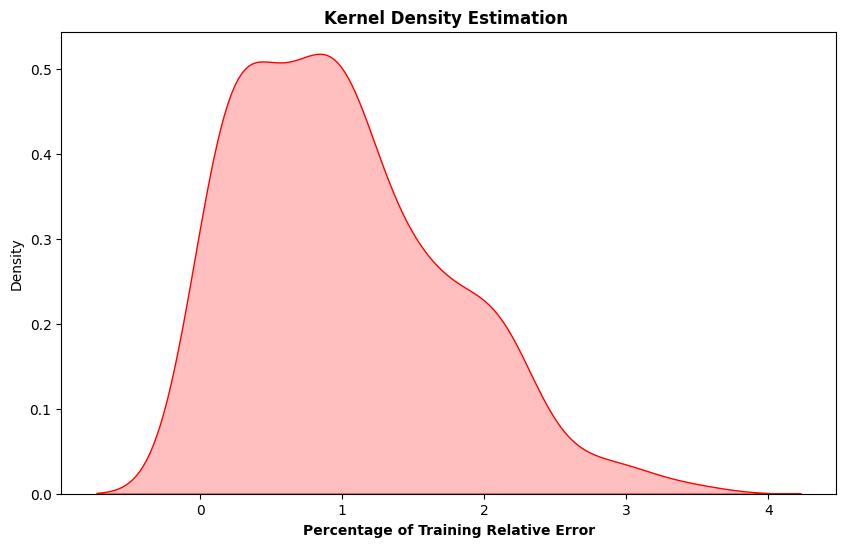

In [57]:
plt.figure(figsize=(10,6))
sns.kdeplot(f_train_err['Training Error'],shade=True,color='r',kernel='gau',)
plt.xlabel('Percentage of Training Relative Error',fontweight='bold')
plt.title('Kernel Density Estimation ',fontweight='bold');

In [58]:
# Summary statistics of training_error.
f_train_err.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Training Error,228.0,1.013254,0.730849,0.01149,0.427671,0.911213,1.489436,3.48995


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


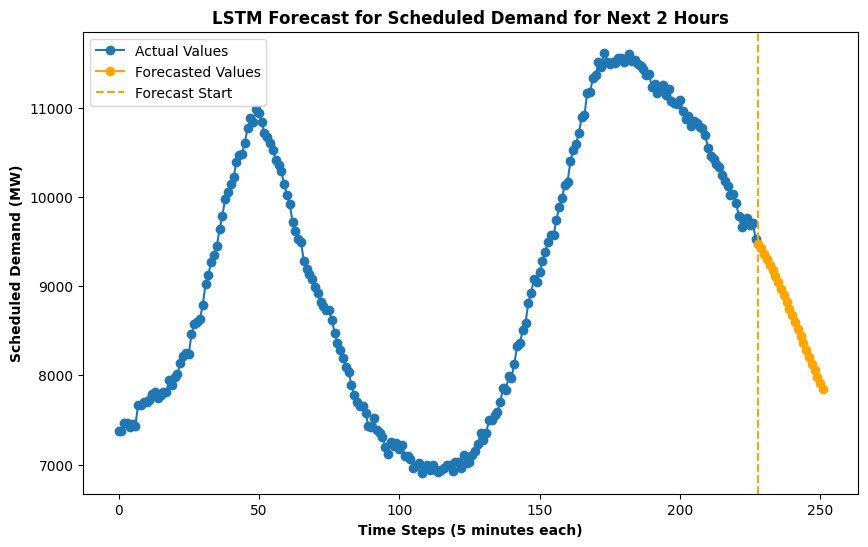

In [59]:
# Forecasting the scheduled demand for the next 2 hours (assuming data is recorded every 5 minutes)
forecast_steps = 24  # 2 hours * 60 minutes / 5 minutes per step

# Create a batch for forecasting
forecast_batch = scaled_set[-length:]  # Use the last 'length' data points from the scaled set
forecast_batch = forecast_batch.reshape((1, length, 1))

# Generate the forecast
forecast = []
for i in range(forecast_steps):
    forecast_out = model.predict(forecast_batch)[0]
    forecast.append(forecast_out)
    forecast_batch = np.append(forecast_batch[:, 1:, :], [[forecast_out]], axis=1)

# Inverse transform the forecast to get the actual scheduled demand values
forecast = data_scaler.inverse_transform(forecast)

# Combine the actual values with the forecasted values for plotting
combined_values = np.concatenate((f_train, forecast))

# Plot the actual and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(combined_values[:len(f_train)], marker='o', linestyle='-', label='Actual Values')
plt.plot(range(len(f_train), len(combined_values)), combined_values[len(f_train):], marker='o', linestyle='-', color='orange', label='Forecasted Values')
plt.axvline(x=len(f_train), color='orange', linestyle='--', label='Forecast Start')
plt.title('LSTM Forecast for Scheduled Demand for Next 2 Hours', fontweight='bold')
plt.xlabel('Time Steps (5 minutes each)', fontweight='bold')
plt.ylabel('Scheduled Demand (MW)', fontweight='bold')
plt.legend()
plt.show()



